Contact tracing is a process used by public health ministries to help stop the spread of infectious disease such as COVID-19.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
df = pd.read_json('C:/Users/USER/Downloads/livedata.json')
df.tail()

,id,timestamp,latitude,longitude
95,Judy,2020-07-04 16:35:30,13.176481,77.619396
96,Bob,2020-07-04 15:35:30,13.172339,77.662080
97,Grace,2020-07-04 23:35:30,13.115079,77.697991
98,Bob,2020-07-04 19:35:30,13.180751,77.704404
99,Alice,2020-07-04 19:35:30,13.206235,77.595245


In [ ]:
#positions of every person every time stamp

In [67]:
df.describe()

,latitude,longitude
count,100.000000,100.000000
mean,13.134709,77.639229
std,0.069591,0.046132
min,13.010284,77.553381
25%,13.081266,77.596577
50%,13.133868,77.646240
75%,13.195195,77.681645
max,13.249645,77.705454


In [2]:
df.shape

(100, 4)

In [2]:
df.columns

Index(['id', 'timestamp', 'latitude', 'longitude'], dtype='object')

In [17]:
df['id'].unique()

array(['David', 'Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice',
       'Judy', 'Heidi'], dtype=object)

In [23]:
##### scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [24]:
#df.columns there are 4 cols like id,timestamp,latitude,longitude


In [25]:
BBox = (df.longitude.min(),df.longitude.max(),df.latitude.min(), df.latitude.max())
BBox
#i find the minimum longitude value,max longitude value,min,max value

(77.5533811, 77.7054541, 13.0102837, 13.2496455)

In [6]:
# banglore_m = plt.imread('../input/bangalore-map/map.png')
# fig, ax = plt.subplots(figsize = (10,10))
# ax.scatter(df.longitude, df.latitude)
# ax.set_title('Plotting Spatial Data on Map')
# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(banglore_m, extent = BBox, aspect= 'equal')
# plt.show()#take pic from kag

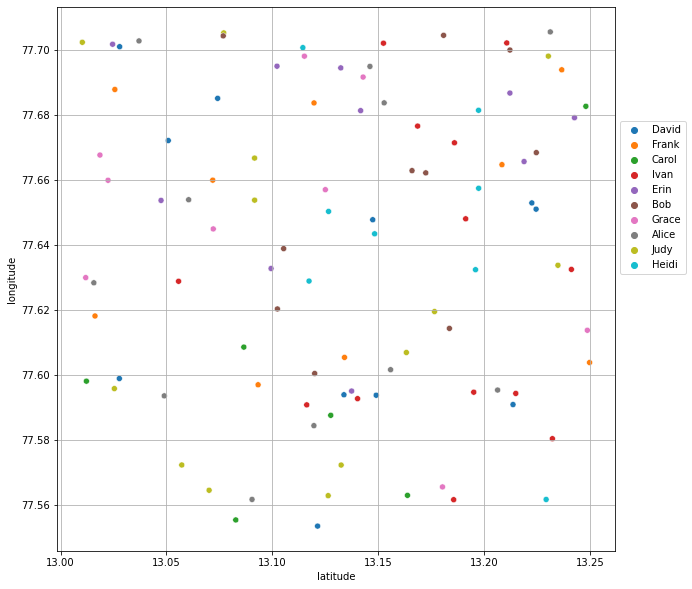

In [89]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="latitude",y="longitude",data=df,hue="id")
plt.legend(bbox_to_anchor= [1, 0.8])
plt.grid()

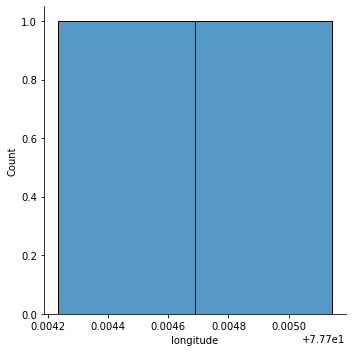

In [85]:
sns.displot(data=df,x='longitude')

In [86]:
#sns.jointplot(x='latitude', y='longitude', data=df, color='red',kind='kde')

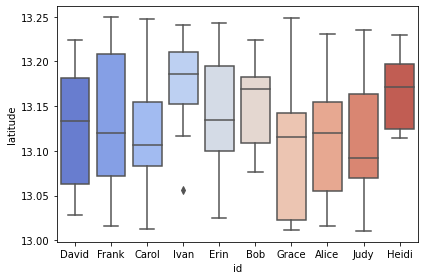

In [29]:
sns.boxplot(x='id', y= 'latitude', data = df, palette = 'coolwarm')
plt.tight_layout()

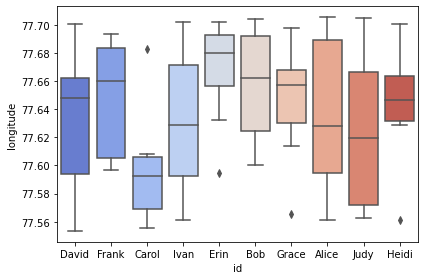

In [68]:
sns.boxplot(x='id',y='longitude',data=df, palette='coolwarm')
plt.tight_layout()

In [69]:
a=df[df.id=='Ivan']
a.head()

,id,timestamp,latitude,longitude
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
16,Ivan,2020-07-04 20:35:30,13.241058,77.632370
18,Ivan,2020-07-04 12:35:30,13.194985,77.594589
20,Ivan,2020-07-04 21:35:30,13.055701,77.628720
22,Ivan,2020-07-04 13:35:30,13.168495,77.676476


In [6]:
# def generateBaseMap(default_location, default_zoom_start=12):
#     base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
#     return base_map
# understand the meaning of th code

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ KB


In [71]:
df.duplicated().value_counts()

False    100
dtype: int64

In [4]:
df=df.drop_duplicates()

In [5]:
df.isnull().sum()

id           0
timestamp    0
latitude     0
longitude    0
dtype: int64

In [6]:
df.dtypes

id                   object
timestamp    datetime64[ns]
latitude            float64
longitude           float64
dtype: object

In [58]:
df.timestamp.head()[0]

Timestamp('2020-07-04 15:35:30')

In [90]:
# Converting column to datetime
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')#already the date column is in date format only
# Creating hour column
df['hour']=df['timestamp'].apply(lambda x: x.hour+1)
df.head(10)

,id,timestamp,latitude,longitude,hour
0,David,2020-07-04 15:35:30,13.148953,77.593651,16
1,David,2020-07-04 16:35:30,13.222397,77.652828,17
2,Frank,2020-07-04 14:35:30,13.236507,77.693792,15
3,Carol,2020-07-04 21:35:30,13.163716,77.562842,22
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273,23
5,Erin,2020-07-04 14:35:30,13.132235,77.694382,15
6,Bob,2020-07-04 13:35:30,13.224501,77.668313,14
7,Grace,2020-07-04 14:35:30,13.142778,77.691560,15
8,Alice,2020-07-04 22:35:30,13.090368,77.561579,23
9,Frank,2020-07-04 12:35:30,13.208293,77.664607,13


In [91]:
epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
model = DBSCAN(eps = epsilon, min_samples = 2, metric = 'haversine').fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

C:\Users\USER\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


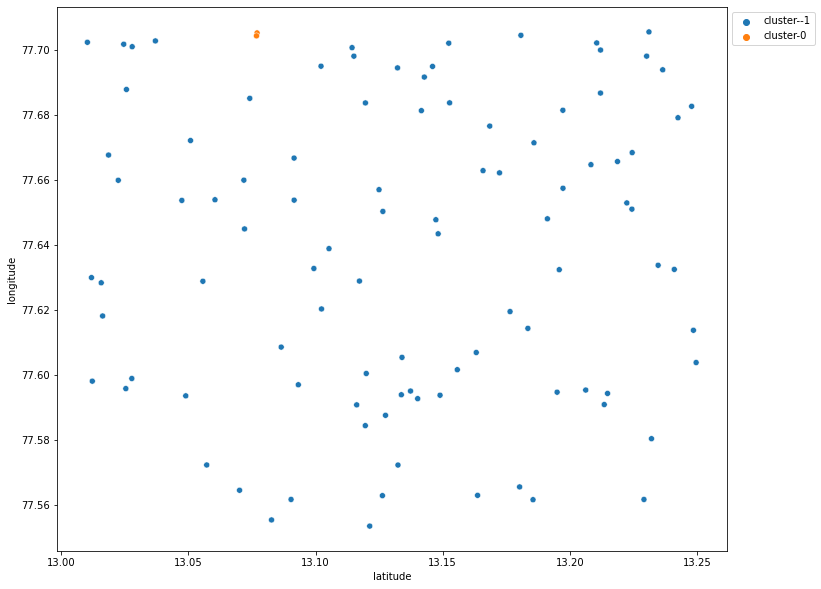

In [93]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])

C:\Users\USER\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


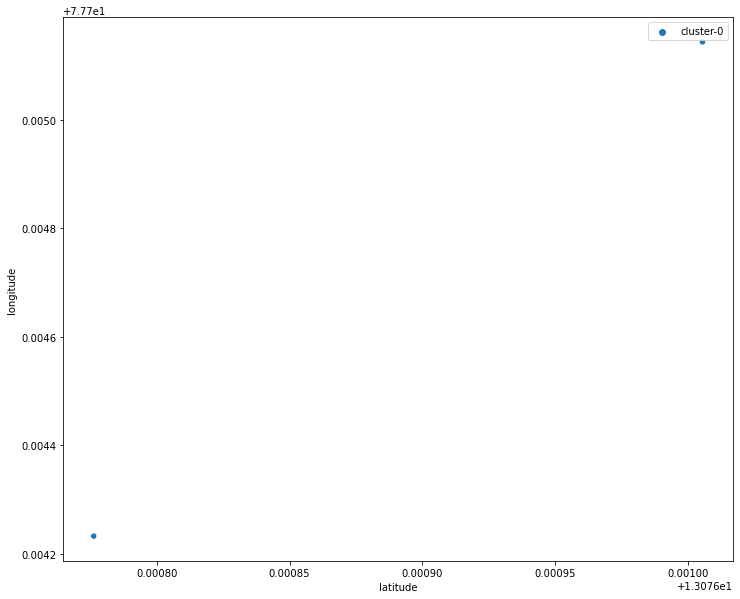

In [94]:
ids = df[(df['cluster'] == -1)].index
df.drop(ids, inplace = True)
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster-{}'.format(x) for x in df['cluster']])
plt.legend(bbox_to_anchor = [1, 1])

In [95]:
def get_infected_names(input_name):
    df = pd.read_json('C:/Users/USER/Downloads/livedata.json')
    epsilon = 5.721 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names

In [98]:
get_infected_names('Erin')

['David', 'Frank', 'Carol', 'Ivan', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']

In [99]:
get_infected_names('David')

['Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']

In [100]:
get_infected_names('Grace')

['David', 'Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Alice', 'Judy', 'Heidi']

In [63]:
# df2=pd.DataFrame(df.groupby(['hour','id'])['timestamp'].max())
# #df2.reset_index(inplace=True) why da?
# df2.head() # data manim codes ok d not exe

In [62]:
# df3=pd.merge(df2,df,left_on=['hour','id','timestamp'],right_on=['hour','id','timestamp'])
# df3.head() # data manim codes ok  d not exe

In [14]:
# lat_long_list = []
# for i in range(1,25):
#     temp=[]
#     for index, instance in df3[df3['hour'] == i].iterrows():
#         temp.append([instance['latitude'],instance['longitude']])
#     lat_long_list.append(temp)

In [53]:
from branca.element import Element, Figure, Html, MacroElement


In [54]:

fig=Figure(width=550,height=350)

In [13]:
!pip install folium


In [59]:
# import folium
# from folium.plugins import HeatMapWithTime
# fig7=Figure(width=850,height=550)
# m7=folium.Map(location=[13.12, 77.8],zoom_start=10)
# HeatMapWithTime(lat_long_list,radius=15,auto_play=True,position='bottomright').add_to(m7)
# m7

In [ ]:
#the function identifies the individuals in the same clusters as the input name (excluding the input name itself) 
#and adds their names to a list called "infected_names". 

In [6]:

# epsilon = 0.0018288 # a radi

In [57]:

#I changed epsilion value from some value to 5.721
#i changed min samples value to 3,100

In [ ]:
#

In [1]:
a=4
b=5
#
#iterate from 1 to 10.
l1=[]
for i in range(1,11):
    if i%2==0:
        pass
    else:
        l1.append(i**2)
print(l1)
#pass works as an if loop stmt.ctrl moves to next iteration .either if or else gets executed.

[1, 9, 25, 49, 81]


In [ ]:
#we can cluster the dp of lat and long columns using DBSCAn algorithm.no need to calculate the distance.


In [ ]:
#Clustering analysis or simply Clustering is basically an Unsupervised learning method
that divides the data points into a number of specific batches or groups, such that the data points 
in the same groups have similar properties and data points in different groups have different properties 

In [ ]:
#DBSCAN (distance between nearest points)